## Clasifico los audios, se ordenan en carpetas para su posterior uso en el train

In [3]:
import os
import shutil

# Directorio con los archivos de audio
audio_directory = '/Users/maxiabdala/Documents/python/series_temporales_maxi/trabajo_final/codigo/audiosTrabajoFinal/audiosCortadosVideo4-6-2'

# Directorios de salida organizados por clase
output_directories = {
    'moto': 'data/train/moto',
    'auto': 'data/train/auto',
    'camioneta': 'data/train/camioneta',
    'colectivo': 'data/train/colectivo'
}

# Crear directorios de salida si no existen
for dir in output_directories.values():
    if not os.path.exists(dir):
        os.makedirs(dir)

# Mover archivos a sus carpetas correspondientes
for filename in os.listdir(audio_directory):
    if filename.endswith(".mp3") or filename.endswith(".wav"):
        if 'moto' in filename:
            shutil.move(os.path.join(audio_directory, filename), os.path.join(output_directories['moto'], filename))
        elif 'auto' in filename:
            shutil.move(os.path.join(audio_directory, filename), os.path.join(output_directories['auto'], filename))
        elif 'camioneta' in filename:
            shutil.move(os.path.join(audio_directory, filename), os.path.join(output_directories['camioneta'], filename))
        elif 'colectivo' in filename:
            shutil.move(os.path.join(audio_directory, filename), os.path.join(output_directories['colectivo'], filename))


In [4]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def save_spectrogram(audio_path, output_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_path)
    # Calcular el espectrograma utilizando STFT
    S = librosa.stft(y)
    S_DB = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Crear una figura para el espectrograma
    plt.figure(figsize=(10, 4))
    # Mostrar el espectrograma
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='log')
    # Añadir una barra de color
    plt.colorbar(format='%+2.0f dB')
    # Título de la figura
    plt.title('Spectrogram')
    # Ajustar el diseño para que no haya espacios extra
    plt.tight_layout()
    # Quitar los ejes para guardar solo la imagen del espectrograma
    plt.axis('off')
    # Guardar la figura en el path especificado
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    # Cerrar la figura
    plt.close()

def process_audio_directory(input_dir, output_dir):
    # Crear el directorio de salida si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Recorrer todos los archivos en el directorio de entrada
    for root, _, files in os.walk(input_dir):
        for file in files:
            # Procesar solo archivos con extensión .mp3 o .wav
            if file.endswith('.mp3') or file.endswith('.wav'):
                # Obtener la ruta completa del archivo de audio
                audio_path = os.path.join(root, file)
                # Obtener la ruta relativa del archivo respecto al directorio de entrada
                relative_path = os.path.relpath(root, input_dir)
                # Crear la ruta de salida para guardar el espectrograma
                output_path = os.path.join(output_dir, relative_path, os.path.splitext(file)[0] + '.png')
                
                # Crear la carpeta de salida si no existe
                output_folder = os.path.dirname(output_path)
                if not os.path.exists(output_folder):
                    os.makedirs(output_folder)
                
                # Guardar el espectrograma del archivo de audio
                save_spectrogram(audio_path, output_path)

# Definir la ruta específica para los audios de entrenamiento
input_directory_train = '/Users/maxiabdala/Documents/python/series_temporales_maxi/trabajo_final/codigo/data/train'
output_directory_train = '/Users/maxiabdala/Documents/python/series_temporales_maxi/trabajo_final/codigo/data/train_spectrograms'
# Procesar los audios de entrenamiento y generar los espectrogramas
process_audio_directory(input_directory_train, output_directory_train)

# Definir la ruta específica para los audios de validación
input_directory_val = '/Users/maxiabdala/Documents/python/series_temporales_maxi/trabajo_final/codigo/data/val'
output_directory_val = '/Users/maxiabdala/Documents/python/series_temporales_maxi/trabajo_final/codigo/data/val_spectrograms'
# Procesar los audios de validación y generar los espectrogramas
process_audio_directory(input_directory_val, output_directory_val)


In [5]:
def display_spectrograms(directory):
    # Recorrer todos los archivos en el directorio de espectrogramas
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.png'):
                # Obtener la ruta completa del archivo de imagen
                img_path = os.path.join(root, file)
                # Leer y mostrar la imagen
                img = plt.imread(img_path)
                plt.figure(figsize=(10, 4))
                plt.imshow(img)
                plt.title(file)
                plt.axis('off')
                plt.show()

Espectrogramas de entrenamiento:


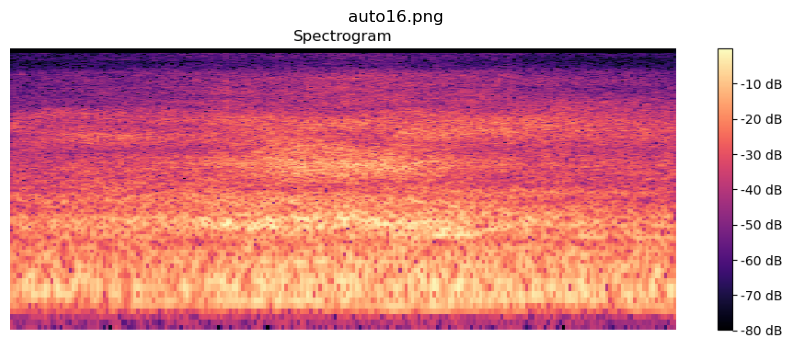

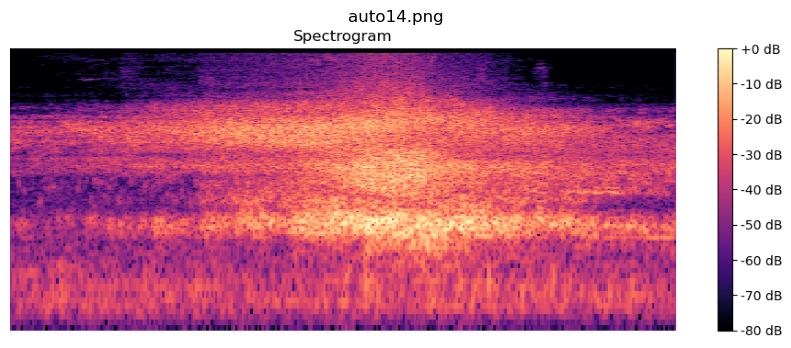

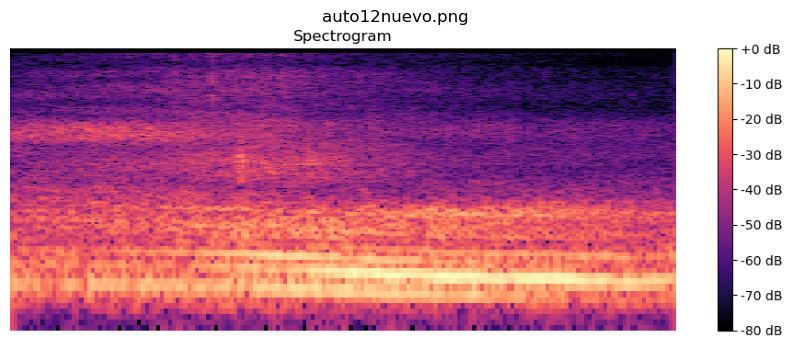

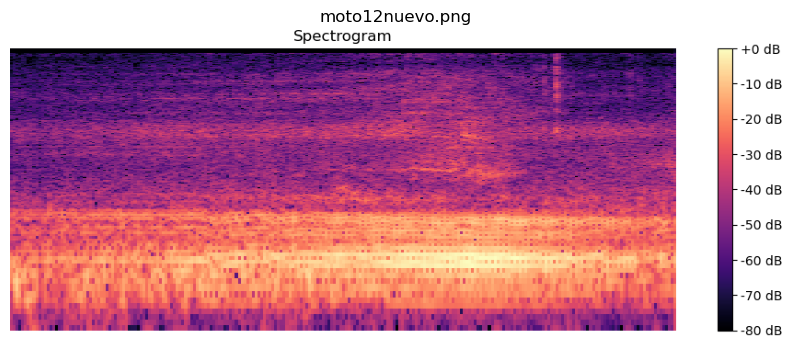

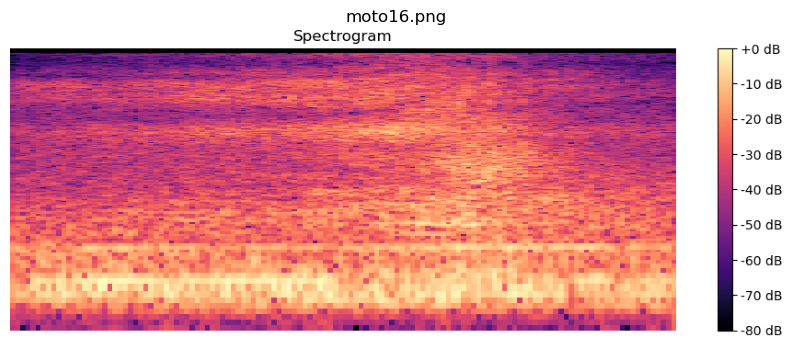

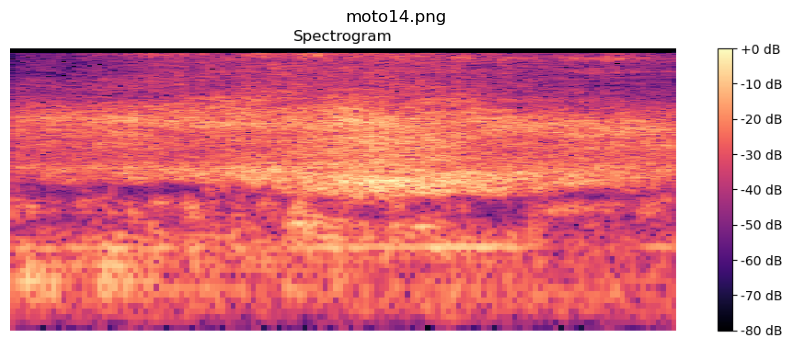

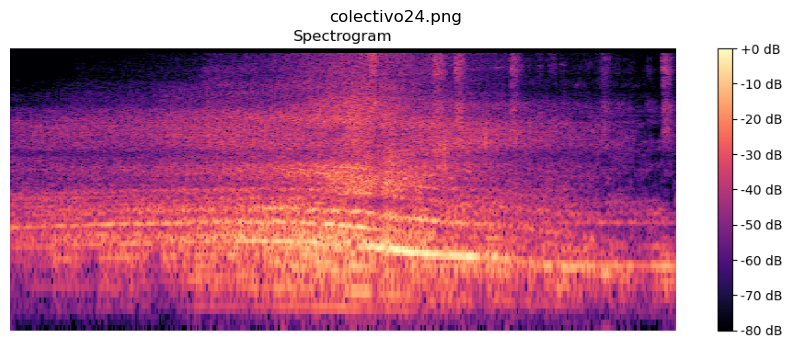

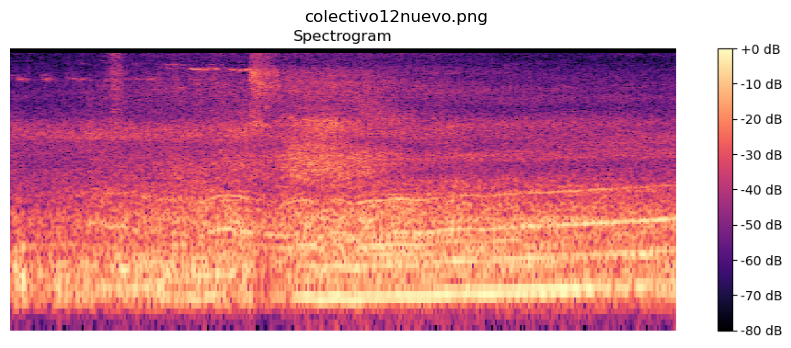

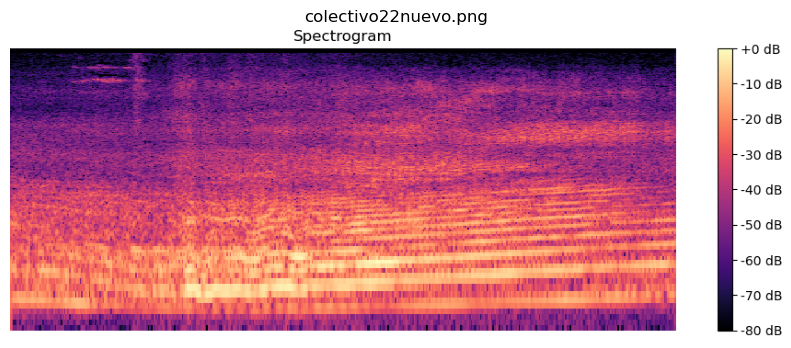

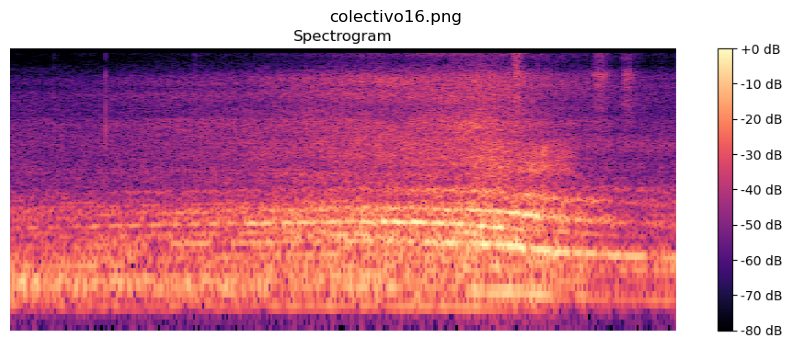

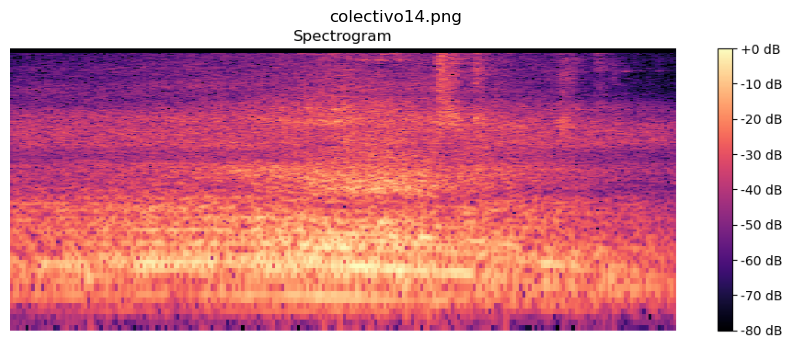

Espectrogramas de validación:


In [6]:
# Mostrar los espectrogramas generados para entrenamiento
print("Espectrogramas de entrenamiento:")
display_spectrograms(output_directory_train)

# Mostrar los espectrogramas generados para validación
print("Espectrogramas de validación:")
display_spectrograms(output_directory_val)